# Self-Similarity Matrices

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa

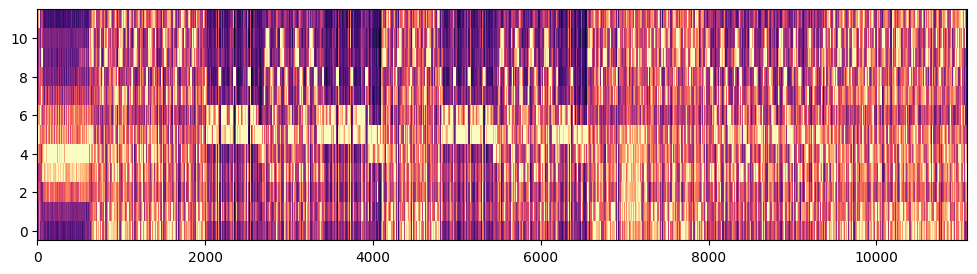

In [2]:
y1, sr = librosa.load("smooth.mp3")
hop = 512
X = librosa.feature.chroma_cqt(y=y1, hop_length=hop)
plt.figure(figsize=(12, 3))
plt.imshow(X, aspect='auto', interpolation='none', cmap='magma')
plt.gca().invert_yaxis()

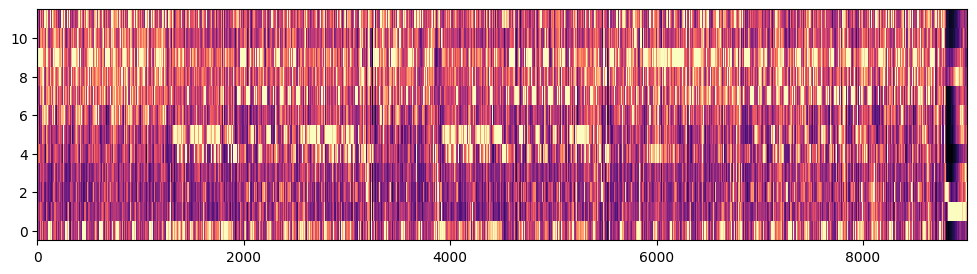

In [3]:
y2, sr = librosa.load("aliensmooth.mp3")
hop = 512
X2 = librosa.feature.chroma_cqt(y=y2, hop_length=hop)
plt.figure(figsize=(12, 3))
plt.imshow(X2, aspect='auto', interpolation='none', cmap='magma')
plt.gca().invert_yaxis()

## Making self-similarity matrices

Make a method that takes in a chromagram (chroma spectrogram) $X$ with $M$ columns and which computes an $M \times M$ array $D$ where

## $D_{i, j} = \frac{X_i \cdot X_j}{|X_i| |X_j|} $



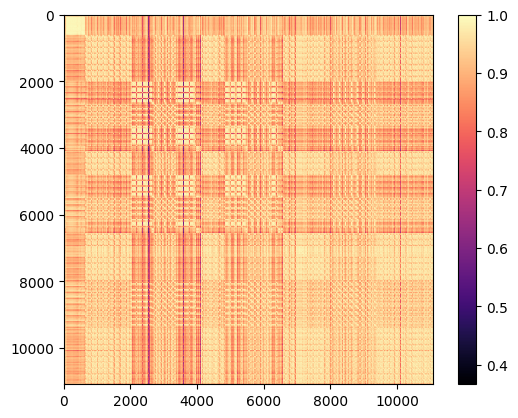

In [6]:
def get_self_similarity_matrices(X):
    """
    Params;
        X -> which is a chroma spectrogram
        - M columns
    Returns;
        D -> M x M matrix
    """
    """
    M = X.shape[1]
    D = np.zeros((M, M))
    
    for i in range(M):
        Xi = X[:, i]
        for j in range(M):
            Xj = X[:, j]
            Xi = Xi/np.linalg.norm(Xi)
            Xj = Xj/np.linalg.norm(Xj)

            D[i,j] = np.sum(Xi*Xj)
    """
    norm = np.sqrt(np.sum(X**2, axis = 0))
    X = X/norm[None, :]
    
    return np.dot(X.T, X)
    
    
    
D = get_self_similarity_matrices(X)
plt.imshow(D, cmap='magma')
plt.colorbar()

## Time-Averaging Chunks

Create a method that replaces a $12 x M$ chromagram $C$ by a $12 x (M/f)$ chromagram $C_f$, in which each column of $C_f$ is the average of $f$ contiguous columns in $C$


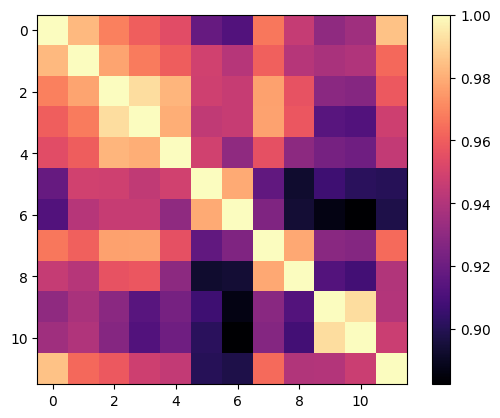

In [11]:
def average_aggregate(X, fac):
    Y = np.zeros((X.shape[0]//fac, X.shape[1]))
    for i in range(Y.shape[0]):
        Y[i, :] = np.mean(X[i*fac: (i+1)*fac, :], axis = 0)
    return Y

D = get_self_similarity_matrices(average_aggregate(X.T, 20))
plt.imshow(D, cmap='magma')
plt.colorbar()

## Diagonally Enhance

Write a method that takes in an $N \times N$ self-similarity matrix $D$ and a parameter $K$, and which returns a $(N-K+1) \times (N-K+1)$ self-similarity matrix $S$ where 

## $S_{i, j} = \sum_{k=0}^{K-1} D_{i+k, j+k} $
